# **PROJETO 1** - Ciência dos Dados


Nome: **William Augusto Reis da Silva | 2A Engenharia**

## PERGUNTA
*Considerando que alguns dos objetivos da OEA é promover o desenvolvimento econômico e reduzir as desigualdades, um país que adentrou à organização aumentou seu PIB e reduziu o índice de desigualdade?*


### INTRODUÇÃO

O intuito deste projeto é analisar os dados de alguns países pertencentem à Organização dos Estados Americanos, instituição mais explicitada nas linhas abaixo, para conferir seus parâmetros e possíveis mudanças internas nos países com a inserção destes em tal organização. Apesar de não ser um bloco econômico, a OEA possui alguns objetivos econômicos, e que também refletem num possível impacto social, tendo em vista que países da América sempre possuíram problemas em comum.

Os dados foram obtidos através do site https://www.gapminder.org/, que possui um grande banco de dados acerca de diversas questões sobre os países. Foram obtidos:
        1. PIB bruto;
        2. Índice de Gini;
        3. Dados Gerais - "WorldBank";
        4. Balança comercial dos países.
       


### OEA - Organização dos Estados Americanos
A OEA é uma organização internacional, que foi fundada em 1948, e que possui atualmente 35 membros independentes, pertencentes ao continente americano. Iniciou com 21 países, mas com o tempo foi conseguindo mais adeptos. Os países se comprometem em defender os interesses do continente, visando a soluções pacíficas para o desenvolvimento, social, econômico e cultural. Ademais, tem objetivo de assegurar a democracia nos países e fortalecer a discussão acerca de tráfico de drogas, comércio, integração econômica, além de também prezar pelo fim da pobreza extrema e pela redução da desigualdade.
Ademais, apesar da OEA ser criada em 1948, só teve atuações significativas após 1959 [1], o que influencia totalmente para a análise crítica dos dados.
    

### Explicação da hipótese e mecanismo

A partir disso, parte-se para a análise, procurando saber se alguns dos pilares estão sendo cumpridos de fato. Para isso, passa-se pelo tópico do desenvolvimento associado à desigualdade. 

Para iniciar, pressupõe que, após se juntar à OEA, um país vai aumentar seu PIB, tendo em vista que irá manter mais relações com os países do continente americano, o que aumenta suas trocas comerciais[2], consequentemente gerando mais riquezas para o país, impactando positivamente no PIB. Por outro lado, acredita-se que isso aumentará o índice de gini, mesmo que o PIB aumente, tendo em vista que medidas neoliberais, como a abertura comercial, sem o auxílio de propostas auxiliadoras, têm a tendência de causar maior desigualdade social[3] no país, por conta de questões de concentração de riqueza. 


Com isso, é possível separar a análise em partes para refutar posteriormente à pergunta inicial:
    1. Analisar se os países de fato aumentaram as relações comerciais;
    2. Caso sim, analisar se houve crescimento do PIB - ainda comparando com não pertencentes. Caso contrário, dar uma possível explicação embasada;
    3. Analisar os dados do Índice de Gini - comparando com países não pertencentes, para ver como ocorre;
    4. Analisar se há relação do Índice de Gini com o PIB.

### Leitura dos arquivos

In [16]:
# Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
    
# Estilo dos gráficos 
import matplotlib
matplotlib.style.use('ggplot')

In [353]:
gini = pd.read_excel('gini.xlsx')
mundo = pd.read_excel('WorldBank.xlsx')
pib_total = pd.read_excel('total_gdp_ppp_inflation_adjusted.xlsx')
balanca = pd.read_excel('trade_balance_percent_of_gdp.xlsx')

## Análise qualitativa dos países

Abaixo, irei fazer uma análise visando à seleção dos países para análise posterior. Pegando uma amostra dos países mais conhecidos pertencentes à OEA, irei mostrar quais são pouco desenvolvidos, mediamente desenvolvidos ou se são bastate desenvolvidos em comparação com os países em geral do continente, baseando-se em dados do Fundo Monetário Internacional[4] e da CIA[5]. Essa análise servirá como base para determinar quais países serão utilizados para se analisar os dados, já que é mister pegar nações comparáveis.

In [329]:
qualitativa = {
    "Países": [ "Argentina", "Bahamas", "Bolívia", "Belize", "Brasil", "Canadá", "Chile", 
                "Colômbia", "Costa Rica", "Cuba", "El Salvador", "Equador", "Estados Unidos",
                "Honduras", "México", "Nicarágua", "Paraguai", "Peru", "República Dominicana",
                "Suriname", "Uruguai", "Venezuela"],
    "Economia": [2,0,0,0,2,2,1,1,0,0,0,0,2,0,2,0,0,1,0,0,1,0]
}

# Mudando o índice
df = pd.DataFrame(data=qualitativa).set_index("Países")
df.Economia = df.Economia.astype('category')
df.Economia.cat.categories = ['Baixa', 'Média', 'Alta']

# Contando a quantidade em cada tópico
print(df.Economia.value_counts())

# Transpondo para que se tenha uma análise melhor
df.transpose()

Baixa    13
Alta      5
Média     4
Name: Economia, dtype: int64


Países,Argentina,Bahamas,Bolívia,Belize,Brasil,Canadá,Chile,Colômbia,Costa Rica,Cuba,...,Estados Unidos,Honduras,México,Nicarágua,Paraguai,Peru,República Dominicana,Suriname,Uruguai,Venezuela
Economia,Alta,Baixa,Baixa,Baixa,Alta,Alta,Média,Média,Baixa,Baixa,...,Alta,Baixa,Alta,Baixa,Baixa,Média,Baixa,Baixa,Média,Baixa


A partir disso, nota-se que a américa possui a maioria dos países com grau de desenvolvimento econômico baixo em comparação a todos do continente e poucos estão entre as maiores economias do mundo. Por conta disso, utilizarei dos países com um bom desenvolvimento econômico, já que são parecidos economicamente e, portanto, comparáveis nesses quesitos analisados.

Países selecionados:
    1. Brasil
    2. Argentina
    3. México
    4. Chile

Agora, iniciará a análise das séries temporais.

## **BALANÇA COMERCIAL**

Acima, temos os países que pertencem à OEA. No entanto, não seria interessante analisar todos os países por conta das divergentes políticas, tamanhos e particularidades. Por conta disso, foram selecionados países pelos maiores PIB's¹ pertencentes à OEA, porém que podem ser comparados, ou seja, os EUA não foram selecionados, tendo em vista que tem a particularidade de ser referência mundial[6]. Foram pegos os países com economia média e alta, de acordo com a tabela acima, com exceção dos EUA que possuem uma diferença inegável no quesito econômico, sendo insustentável a comparação.


¹ Com exceção de Cuba e Honduras, que são casos particulares que serão discutidos.

###### É importante salientar que não há dados de antes de 1960. No entanto, é uma das datas mais relevantes, sendo ainda de relevância para a análise.

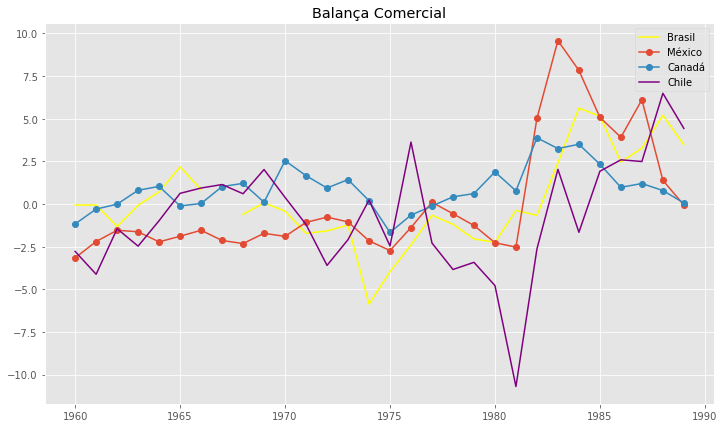

In [33]:
balanca_oea = balanca.loc[
        (balanca.country=="Argentina") |
        (balanca.country=="Brazil") |
        (balanca.country=="Canada") |
        (balanca.country=="Mexico") |
        (balanca.country=="Cuba") |
        (balanca.country=="Honduras") |
        (balanca.country=="Chile")
]

balanca_na = balanca_oea.set_index("country").transpose()

# Foram plotados apenas esses porque os outros não possuem dados completos, como a Argentina, por exemplo
plt.figure(figsize=(12,7))
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Brazil"], 'yellow', label="Brasil")   
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Mexico"],'o-', label="México")
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Canada"],'o-', label="Canadá")
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Chile"],'purple', label="Chile")
plt.title("Balança Comercial")
plt.legend()


A partir desse gráfico, é possível ver que, a partir de 1960, que é quando se tem dados, a tendência da maioria dos países, apesar da oscilação constante - o que é algo comum, tendo em vista que as importações e exportações mudam de acordo com cada política, sendo principalmente influência de aspectos macroeconômicos[7] - é de ter crescido a balança comercial, demonstrando que uma possível influência é a OEA, já que como foi proferido suas ações de fato começaram a ocorrer a partir de 1959. Para conferir se realmente há influências, é mister analisar o PIB.

Há exceções, que ocorreram por questões que não envolvem a OEA:
A questão do Brasil e sua alta queda em 1973 tem por explicação a Crise do Petróleo, que acabou por afetar totalmente a economia do país, que era um dos mais relevantes no quesito petrolífero e, por conta dessa tal questão, foi necessária aumentar as importações, causando esse déficit grande[8].

A do Chile, no entanto, em 1981-1982, tem relação com a ditadura de Pinotchet, que ocasionou diversos impactos na economia e gerou tais resultados[9].

## **PIB BRUTO**

#### PAÍSES PERTENCENTES

Tendo em vista o tópico anterior, infere-se o cálculo do PIB bruto.

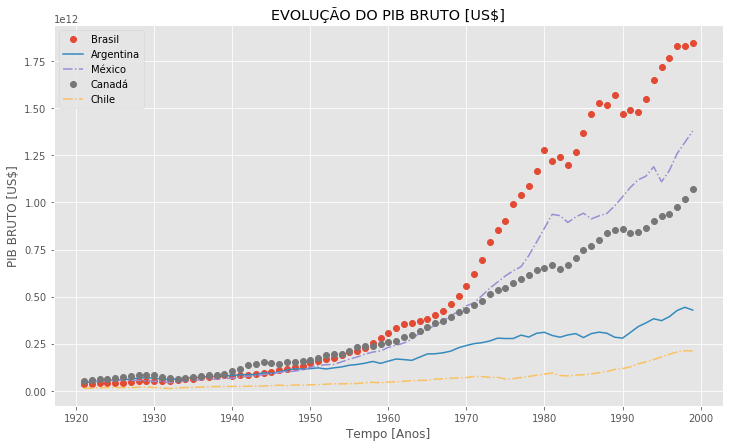

In [39]:
# Selecionando os países que almejo
pib_bruto_oea = pib_total.loc[
        (pib_total.country=="Argentina") |
        (pib_total.country=="Brazil") |
        (pib_total.country=="Canada") |
        (pib_total.country=="Mexico") |
        (pib_total.country=="Chile") |
        (pib_total.country=="Cuba") |
        (pib_total.country=="Honduras")
]

pib_oea = pib_bruto_oea.rename(columns = {'country':'Pais'})
pib_bruto = pib_oea.set_index("Pais").transpose().iloc[:220, :]

# Tirando os anos que não têm dados
pib_bruto_nan = pib_bruto.dropna()

plt.figure(figsize=(12,7))
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Brazil"], 'o', label="Brasil")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Argentina"],'-', label="Argentina")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Mexico"],'-.', label="México")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Canada"],'o', label="Canadá")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Chile"], '-.', label="Chile")
plt.title("EVOLUÇÃO DO PIB BRUTO [US$]")
plt.xlabel("Tempo [Anos]")
plt.ylabel("PIB BRUTO [US$]")
plt.legend()

Com esta série temporal, nota-se um ponto muito relevante: A partir de 1950, os países começam a ter elevação do PIB, sendo que em 1960 o aumento se torna maior ainda para cada ano, tendo o coeficiente angular aumentado, o que aponta e deixa uma possível demonstração de que de fato a entrada na OEA auxiliou no crescimento do PIB, já que foi na época de impacto das políticas que o crescimentou começou a se tornar mais relevante.

Ademais, um ponto importante de se considerar é que o Canadá adentrou somente em 1990, apesar de também apresentar um crescimento desde 1950 também. Isso deixa a questão: foi a OEA que influenciou nos outros países ou outra questão global?

#### PAÍSES NÃO PERTENCENTES

O Brasil está inserido no gráfico apenas para se ter como comparação, porém o intuito é ver se os países fora da OEA, com um perfil parecido com o do Brasil, México, Canadá, também apresentaram crescimento semelhante ou não, visando saber se foi influência da OEA ou do âmbito global.

Text(0.5, 1.0, 'Evolução do PIB (Fora da OEA)')

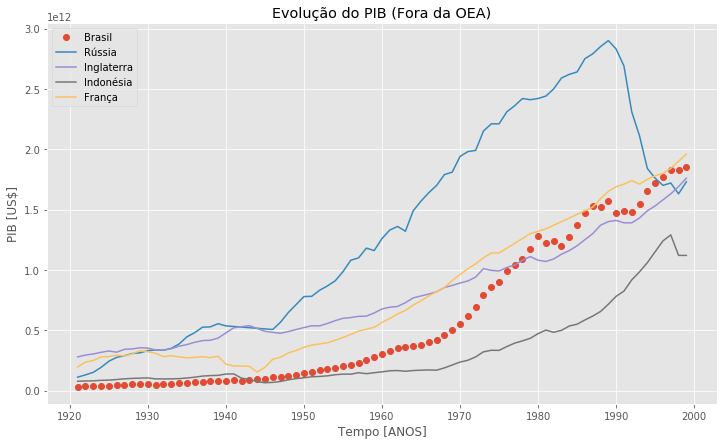

In [31]:
pib_bruto_fora = pib_total.loc[
        (pib_total.country=="Russia") |
        (pib_total.country=="United Kingdom") |
        (pib_total.country=="Indonesia") |
        (pib_total.country=="France") |
        (pib_total.country=="Brazil")
].set_index("country").transpose()

plt.figure(figsize=(12,7))
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "Brazil"],'o', label="Brasil")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "Russia"], label="Rússia")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "United Kingdom"], label="Inglaterra")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "Indonesia"], label="Indonésia")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "France"], label="França")
plt.legend()
plt.ylabel("PIB [US$]")
plt.xlabel("Tempo [ANOS]")
plt.title("Evolução do PIB (Fora da OEA)")

Com esse gráfico, nota-se que todos os países também apresentaram um crescimento mais elevado a partir de 1950, o que aponta para uma possível influência global no quesito do PIB, sem deixar provas suficientes de que foi a OEA que realmente elevou o PIB dos países pertencentes. Uma possível explicação seria o impacto da Guerra Fria, que se iniciou em torno de 1947, tanto que a Rússia (antiga URSS) foi a que mais teve um crescimento relevante, reduzindo em 1889, logo quando foi extinta pelo fim de tal conflito.

## **ÍNDICE DE GINI**

Agora, será feita a análise do Índice de Gini, que mede o nível de desigualdade dos países. Quanto maior o índice, mais desigual é aquele país, naquele determinado ano. A análise irá consistir em ver se os países que entraram à OEA apresentaram uma redução na desigualdade, para ver se de fato este objetivo da OEA está sendo cumprido. A hipótese é de que não tenha redução significativa, mas tenha um aumento, tendo em vista a aplicação de políticas neoliberais.

In [25]:
# Identificando quais são os países que pertencem à OEA e que serão utilizados
gini_paises_da_oea = gini.loc[
    (gini.country=="Argentina") |
    (gini.country=="Brazil") |
    (gini.country=="Canada") |
    (gini.country=="Cuba") |
    (gini.country=="Honduras") |
    (gini.country=="Mexico") |
    (gini.country=="Chile")
]

# Mudando o "country" para "País" e deixando o índice como o nome do país
gini_new = gini_paises_da_oea.rename(columns = {'country':'Pais'})
gini_oea = gini_new.set_index("Pais")

# Foi colocado 220 para delitimar o período, tendo em vista que na tabela já possui previsões
gini_oea.iloc[:,120:220]

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,48.6,48.3,48.1,47.8,47.5,47.2,47.0,46.6,46.3,46.1,...,43.0,42.3,41.8,41.6,41.6,41.8,42.1,42.3,42.4,42.4
Brazil,39.4,40.3,41.2,42.1,42.9,43.7,44.3,44.8,45.3,45.6,...,53.3,53.1,52.6,52.2,51.9,51.6,51.4,51.3,51.3,51.3
Canada,41.2,41.3,41.4,41.6,41.8,42.1,42.5,43.0,43.3,43.3,...,33.7,33.8,33.3,32.8,32.2,31.7,31.1,31.1,31.1,31.1
Chile,61.3,61.8,62.3,62.7,63.1,63.3,63.4,63.3,63.1,62.8,...,48.2,47.9,47.6,47.5,47.5,47.5,47.6,47.7,47.7,47.7
Cuba,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,43.3,43.4,43.4,43.4,43.4,43.4,43.4,43.4,43.4,43.4
Honduras,61.7,61.8,61.9,62.0,62.2,62.3,62.4,62.5,62.6,62.7,...,54.4,53.9,53.7,53.0,51.7,50.5,50.0,50.0,50.1,50.1
Mexico,47.9,48.1,48.2,48.4,48.5,48.7,48.8,48.9,48.9,49.0,...,46.8,46.8,46.9,46.9,46.8,46.5,46.3,46.0,45.9,45.9


Agora que possuímos dados de gini dos países, podemos separar um período de tempo para analisar seus dados. Como a OEA foi criada em 1948, é interessante ressaltar um período considerável antes e depois da data, que foi 1948.

***É importante salientar também que, quanto maior o índice de gini, maior é o nível de desigualdade daquele país.***

In [26]:
# Abaixo, demonstra-se a tabela nos anos selecionados
gini_oea.iloc[:, 120:181]

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,...,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,48.6,48.3,48.1,47.8,47.5,47.2,47.0,46.6,46.3,46.1,...,35.6,35.3,35.2,35.5,36.1,36.9,37.9,38.8,39.7,40.4
Brazil,39.4,40.3,41.2,42.1,42.9,43.7,44.3,44.8,45.3,45.6,...,49.8,50.5,51.3,52.2,53.0,53.8,54.6,55.5,56.3,57.1
Canada,41.2,41.3,41.4,41.6,41.8,42.1,42.5,43.0,43.3,43.3,...,35.2,35.1,34.7,34.3,33.7,33.4,33.1,33.0,32.6,32.6
Chile,61.3,61.8,62.3,62.7,63.1,63.3,63.4,63.3,63.1,62.8,...,50.1,50.2,51.0,51.7,52.5,53.2,54.0,54.7,55.3,55.8
Cuba,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,39.0,39.1,39.2,39.3,39.4,39.5,39.6,39.7,39.9,40.0
Honduras,61.7,61.8,61.9,62.0,62.2,62.3,62.4,62.5,62.6,62.7,...,67.1,66.8,66.4,66.0,65.5,65.1,64.7,64.2,63.8,63.4
Mexico,47.9,48.1,48.2,48.4,48.5,48.7,48.8,48.9,48.9,49.0,...,49.9,49.6,49.2,48.7,48.3,47.9,47.4,47.2,47.1,47.2


Como há muitos dados para se vizualizar, fica interessante separar alguns países para se ter uma vizualização melhor e mais focada, para se ter uma ideia do geral.

Abaixo, separa-se os dados dos cinco países, de 1920 a 1980.

In [28]:
transp_gini = gini_oea.iloc[:,120:220].loc[["Brazil", "Argentina", "Chile", "Mexico", "Canada"]].transpose()

Para se ter uma boa vizualização, é relevante colocar em um gráfico de dispersão, para vizualizar o crescimento ou o decrescimento do Índice de Gini.

Para o Canadá, país que só entrou na OEA em 1990, em comparação aos outros 3 países que já estavam dentro da OEA - entre 1950 e 2019-, tem-se:

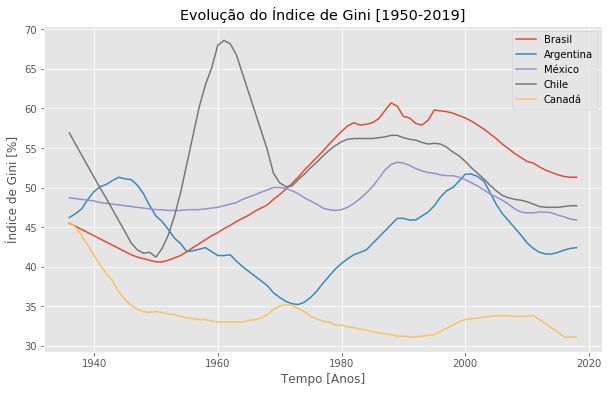

In [40]:
plt.figure(figsize=(10,6))
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 2019), "Brazil"], label="Brasil")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 2019), "Argentina"], label="Argentina")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 2019), "Mexico"], label="México")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 2019), "Chile"], label="Chile")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 2019), "Canada"], label="Canadá")
plt.title("Evolução do Índice de Gini [1950-2019]")
plt.xlabel("Tempo [Anos]")
plt.ylabel("Índice de Gini [%]")
plt.legend()
plt.grid(True)
plt.show()

Nota-se que os países possuem diferentes comportamentos, sendo que a maioria demonstra certo crescimento no período entre 1960-1980. O Canadá também demonstrou crescimento próximo aos anos 1990, que foi quando entrou.

Apesar de ocorrer tais fatos, ainda se torna insustentável de afirmar que foi a OEA que influenciou em tais questões, já que os comportamentos estão bem divergentes.

### PAÍSES DE FORA

Análise dos mesmos países vistos no PIB, vistos agora no gini.

Text(0.5, 1.0, 'Evolução do Gini (Fora da OEA)')

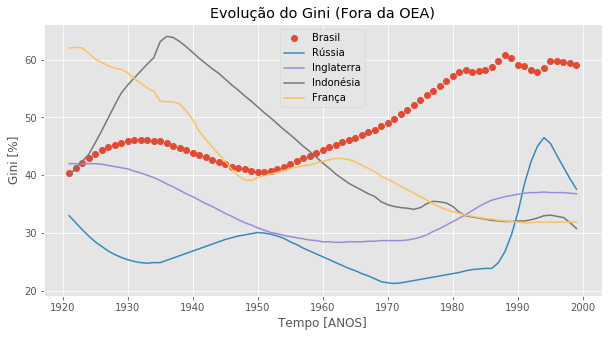

In [46]:
gini_fora = gini.loc[
        (gini.country=="Russia") |
        (gini.country=="United Kingdom") |
        (gini.country=="Indonesia") |
        (gini.country=="France") |
        (gini.country=="Brazil")
].set_index("country").transpose()


plt.figure(figsize=(10,5))
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "Brazil"],'o', label="Brasil")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "Russia"], label="Rússia")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "United Kingdom"], label="Inglaterra")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "Indonesia"], label="Indonésia")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "France"], label="França")
plt.legend()
plt.ylabel("Gini [%]")
plt.xlabel("Tempo [ANOS]")
plt.title("Evolução do Gini (Fora da OEA)")

A partir desse gráfico, confessa-se que houve quebra de expectativas! O gráfico acima mostra que os países do mundo, de fora da OEA, em contrapartida a estes, demonstraram redução do Gini (lembrando que houve elevação do PIB no mesmo período). O aumento mais relevante foi da Rússia, no final da década de 1980, porém foi quando ocorreu diversas mudanças com o fim da URSS, que impactou no país.

Com isso, mostra-se que, ao contrário do que eu pensava, talvez o que mais influenciou nos países da OEA foram questões internas e que talvez o índice de gini reduza com o aumento do PIB, demonstrando que minha hipótese foi contradita. Para isso, irei analisar em um ano e em determinados países a relação entre as duas.

## **RELAÇÃO PIB E ÍNDICE DE GINI**

Aqui, iremos conferir se existe relação entre o crescimento do PIB com o crescimento do Índice de Gini. A hipótese é de que era uma relação diretamente proporcional. No entanto, as análises acima mostraram que possivelmente essa hipótese pode estar equivocada e que o fenômeno ocorrido em alguns países da OEA podem ser influências de políticas internas, já que os países do mundo também abriram seu mercado, cresceram o PIB, mas demonstraram queda no índice de gini. Para isso iremos analisar os dados de alguns anos: 1985, 1995, 2005, 2013, já que é o último ano que se possui dados de PIB no arquivo colocado.

###### 1985

Ajuste linear entre X3 e X4:
Coeficiente linear: 39.39343493026114
Coeficiente angular: -1.947904661537545e-12

           1985_PIB  1985_GINI
1985_PIB   1.000000  -0.135491
1985_GINI -0.135491   1.000000


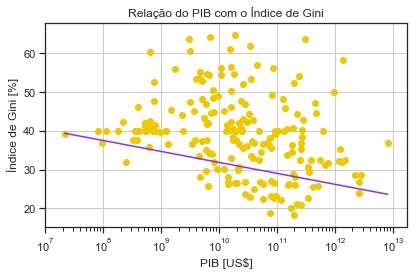

In [361]:
# Função que faz a reta de correlação
def reta(dados_x, dados_y, c, c1):  
    # Calculando os coeficientes angular e linear
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y,c=c)
    plt.title('Relação do PIB com o Índice de Gini')
    plt.xlabel('PIB [US$]')
    plt.ylabel('Índice de Gini [%]')
    
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c1)

    plt.tight_layout()

# Buscando o ano 1985
gini_1985 = gini.loc[:, ['country', 1985]].set_index('country')
pib_1985 = pib_total.loc[:, ['country', 1985]].set_index('country')

df = pib_1985.join(gini_1985, how='inner', lsuffix='_PIB', rsuffix='_GINI')

# Deixando os dados do mesmo tamanho para não dar erro
gini_1985_n = gini_1985.drop("Zimbabwe", axis=0)

# Plotando o gráfico
df.plot.scatter(x="1985_PIB", y="1985_GINI", logx=True, c='#EEC900')
reta(df.loc[:,'1985_PIB'], df.loc[:,'1985_GINI'], "#EEC900", '#912CEE')
plt.grid()
print()
print(df.corr())

###### 1995

Ajuste linear entre X3 e X4:
Coeficiente linear: 40.46135028347722
Coeficiente angular: -8.345282109301467e-13

           1995_PIB  1995_GINI
1995_PIB   1.000000  -0.087578
1995_GINI -0.087578   1.000000


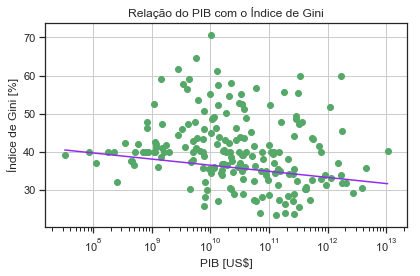

In [360]:
# Buscando o ano 1995
gini_1995 = gini.loc[:, ['country', 1995]].set_index('country')
pib_1995 = pib_total.loc[:, ['country', 1995]].set_index('country')

df = pib_1995.join(gini_1995, how='inner', lsuffix='_PIB', rsuffix='_GINI')

# Deixando os dados do mesmo tamanho para não dar erro
gini_1995_n = gini_1995.drop("Zimbabwe", axis=0)

# Plotando o gráfico
df.plot.scatter(x="1995_PIB", y="1995_GINI", logx=True, c='#EEC900')
reta(df.loc[:,'1995_PIB'], df.loc[:,'1995_GINI'], "g", '#912CEE')
plt.grid()
print()
print(df.corr())

###### 2005

Ajuste linear entre X3 e X4:
Coeficiente linear: 40.00908811317117
Coeficiente angular: -3.40438533265198e-13

           2005_PIB  2005_GINI
2005_PIB   1.000000  -0.059228
2005_GINI -0.059228   1.000000


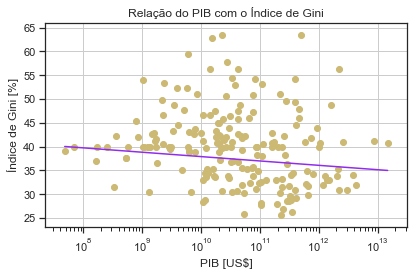

In [359]:
# Buscando o ano 2005
gini_2005 = gini.loc[:, ['country', 2005]].set_index('country')
pib_2005 = pib_total.loc[:, ['country', 2005]].set_index('country')

df = pib_2005.join(gini_2005, how='inner', lsuffix='_PIB', rsuffix='_GINI')

# Deixando os dados do mesmo tamanho para não dar erro
gini_2005_n = gini_2005.drop("Zimbabwe", axis=0)

# Plotando o gráfico
df.plot.scatter(x="2005_PIB", y="2005_GINI", logx=True, c='#EEC900')
reta(df.loc[:,'2005_PIB'], df.loc[:,'2005_GINI'], "y", '#912CEE')
plt.grid()
print()
print(df.corr())

###### 2013

Ajuste linear entre X3 e X4:
Coeficiente linear: 39.090930453119924
Coeficiente angular: -1.2538925247937395e-13

           2013_PIB  2013_GINI
2013_PIB   1.000000  -0.029995
2013_GINI -0.029995   1.000000


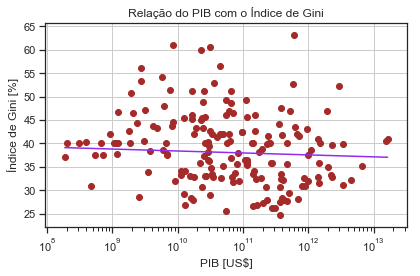

In [362]:
import seaborn as sns

# Buscando o ano 2013
gini_2013 = gini.loc[:, ['country', 2013]].set_index('country')
pib_2013 = pib_total.loc[:, ['country', 2013]].set_index('country')

df = pib_2013.join(gini_2013, how='inner', lsuffix='_PIB', rsuffix='_GINI')

# Deixando os dados do mesmo tamanho para não dar erro
gini_2013_n = gini_2013.drop("Zimbabwe", axis=0)

# Plotando o gráfico
df.plot.scatter(x="2013_PIB", y="2013_GINI", logx=True, c='#EEC900')
reta(df.loc[:,'2013_PIB'], df.loc[:,'2013_GINI'], "brown", '#912CEE')
plt.grid()
print()
print(df.corr())

Com estes quatro gráficos, é possível notar que 

## CONCLUSÃO

A pergunta original é:
     - Considerando que alguns dos objetivos da OEA é promover o desenvolvimento econômico e reduzir as desigualdades, um país que adentrou à organização aumentou seu PIB e reduziu as desigualdades?
     
A partir dos comentários feitos, nota-se que, de fato, um país que adentrou à OEA aumentou seu PIB, já que é demonstrado pelos gráficos. No entanto, 

### REFERÊNCIAS

[1]. KIITHI, Mauro. A organização dos Estados Americanos e o Sistema Interamericano de Direitos Humanos: complementaridade funcional ou contradição congênita?. Revista Jus Navigandi, ISSN 1518-4862, Teresina, ano 21, n. 4574, 9 jan. 2016. Disponível em: https://jus.com.br/artigos/34169. Acesso em: 27 ago. 2019.

[2]. Site da OEA (Organização dos Estados Americanos). Disponível em: https://www.oas.org/pt/topicos/comercio.asp. Acesso em: 18 ago. 2019.

[3]. CARNEIRO, André P; ROSADO GAMBI, Thiago F. Neoliberalismo, Desigualdade e Democracia:
Discussão Fundamentada nos Conselhos Econômicos e Sociais. 2018. Disponível em: http://bibliotecadigital.fgv.br/ojs/index.php/cgpc/article/download/68697/71541. Acesso em: 18 ago. 2019.

[4]. Dados disponíveis em https://pt.countryeconomy.com/paises/grupos/fmi. Acesso em 27 ago. 2019


[5]. Dados disponíveis em https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html. Acesso em 28 ago. 2019


[6]. PENA, Rodolfo F. Alves.	"O Poder dos Estados Unidos"; Brasil Escola. Disponível em: https://brasilescola.uol.com.br/geografia/o-poder-dos-estados-unidos.htm. Acesso em 20 de agosto de 2019.


[7]. Forças econômicas impulsionam as variações da balança comercial. VALOR, 2019. Disponível em: https://www.valor.com.br/blogfmi/6198051/forcas-economicas-impulsionam-variacoes-da-balanca-comercial. Acesso em 28 ago. 2019.

[8]. Impactos da Crise do Petróleo na Economia Brasileira. Disponível em: https://multivix.edu.br/wp-content/uploads/2018/08/impactos-da-crise-do-petroleo-na-economia-brasileira.pdf. Acesso em 28. ago. 2019.

[9]. A Argentina e a crise no Chile. Disponível em https://economia.estadao.com.br/noticias/geral,a-argentina-e-a-crise-chilena-de-82,20020226p25335. Acesso em 28. ago. 2019.
